# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [2]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean
from scipy import ndimage
from skimage import util
from skimage import feature
from skimage import transform
from skimage import draw


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

In [3]:
#import of the lena's image from the devices
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_grey_path = img_path.__add__(img_name)
lena_grey = io.imread(lena_grey_path)

(512, 512)


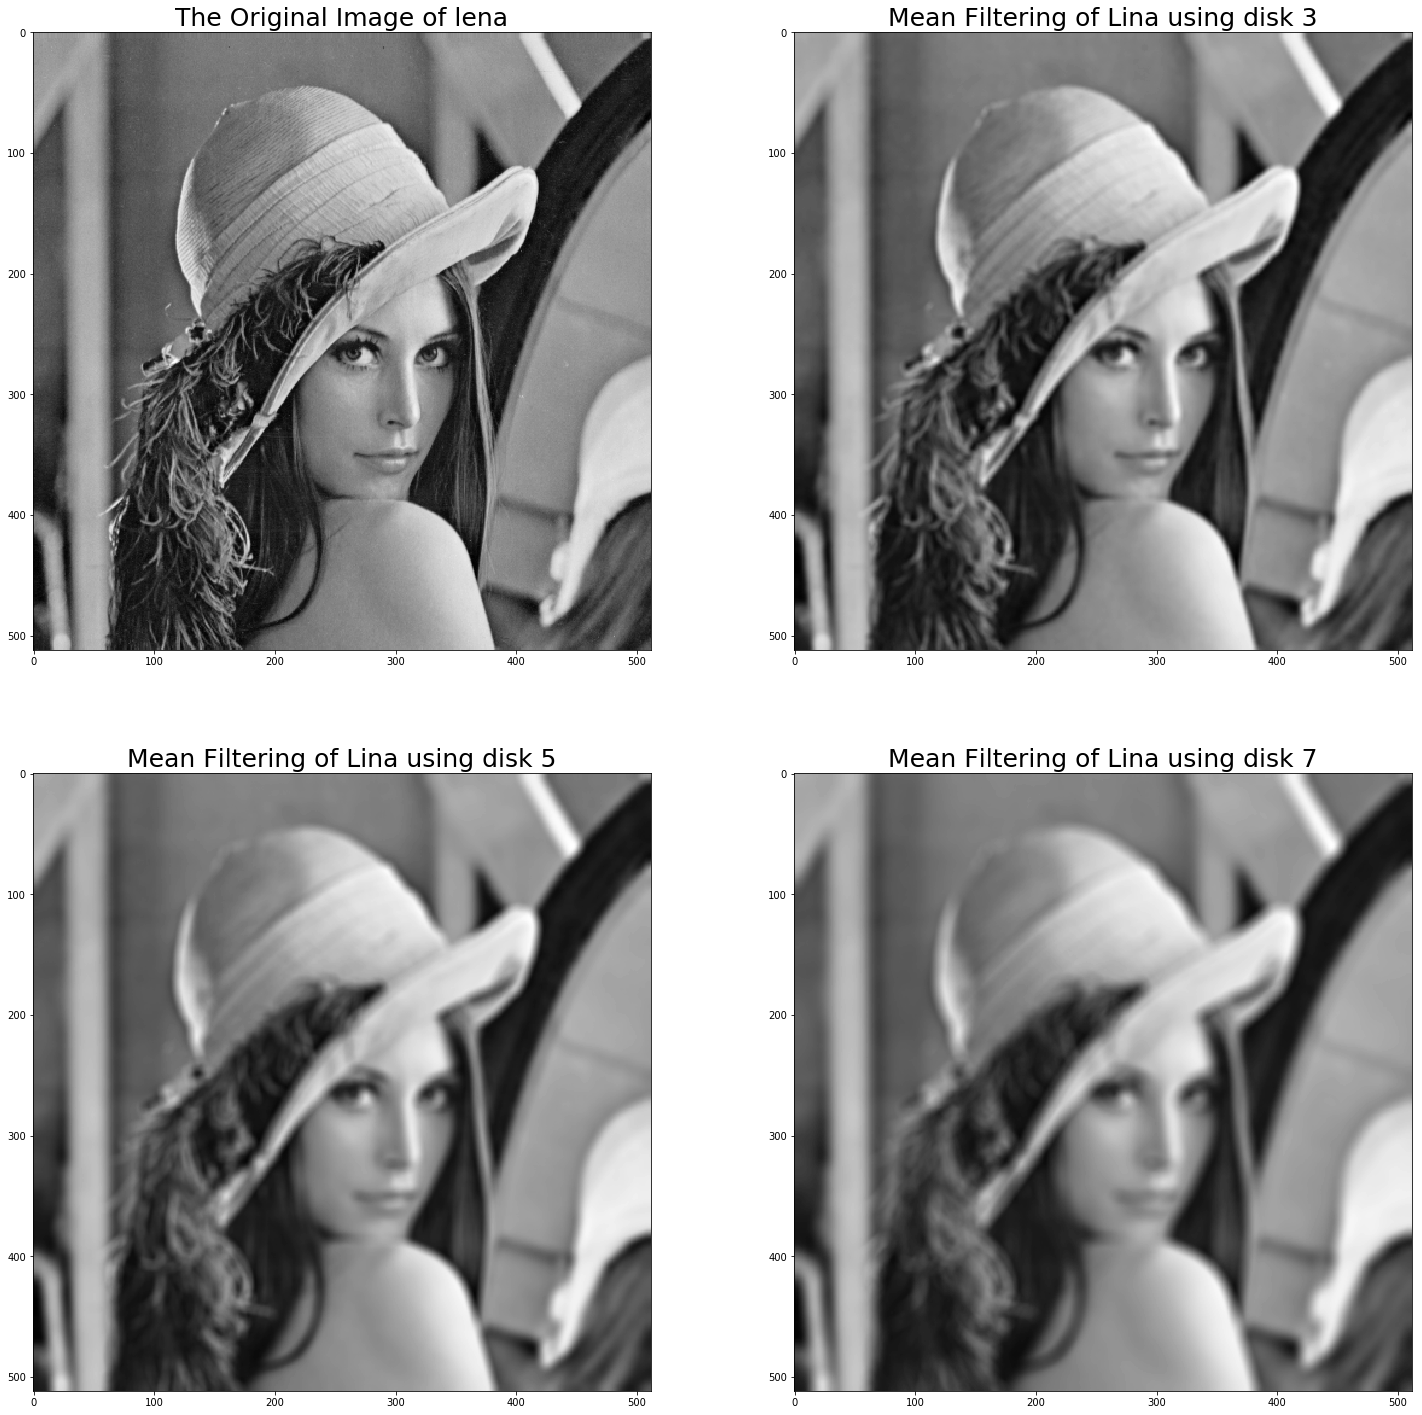

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(lena_grey,cmap = cm.gray)
k1=mean(lena_grey,disk(3))
ax1.imshow(k1,cmap = cm.gray)
k2=mean(lena_grey,disk(5))
ax2.imshow(k2,cmap = cm.gray)
k3=mean(lena_grey,disk(7))
print(k3.shape)
ax3.imshow(k3,cmap = cm.gray)
ax0.set_title('The Original Image of lena',fontsize=25)
ax1.set_title('Mean Filtering of Lina using disk 3',fontsize=25)
ax2.set_title('Mean Filtering of Lina using disk 5',fontsize=25)
ax3.set_title('Mean Filtering of Lina using disk 7',fontsize=25)

### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

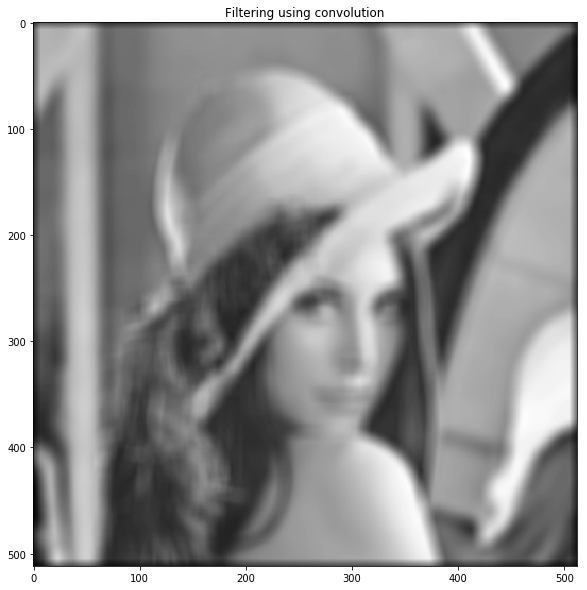

In [5]:
mask = np.ones((15, 15))/(15**2)
Filtered_lena=ndimage.convolve(lena_grey, mask, mode='constant', cval=0.0)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(Filtered_lena,cmap = cm.gray)
axes.set_title('Filtering using convolution')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [6]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

In [7]:
def IsGrey(im):
    if len(im.shape)<3:
        print ('Image is in grey and You put correct image for this code!!')
        check = True
    elif len(im.shape)==3:
        print ('Image is in color.Sorry!! This code will not able to process this RGB images')
        check = False
    return check

Image is in grey and You put correct image for this code!!


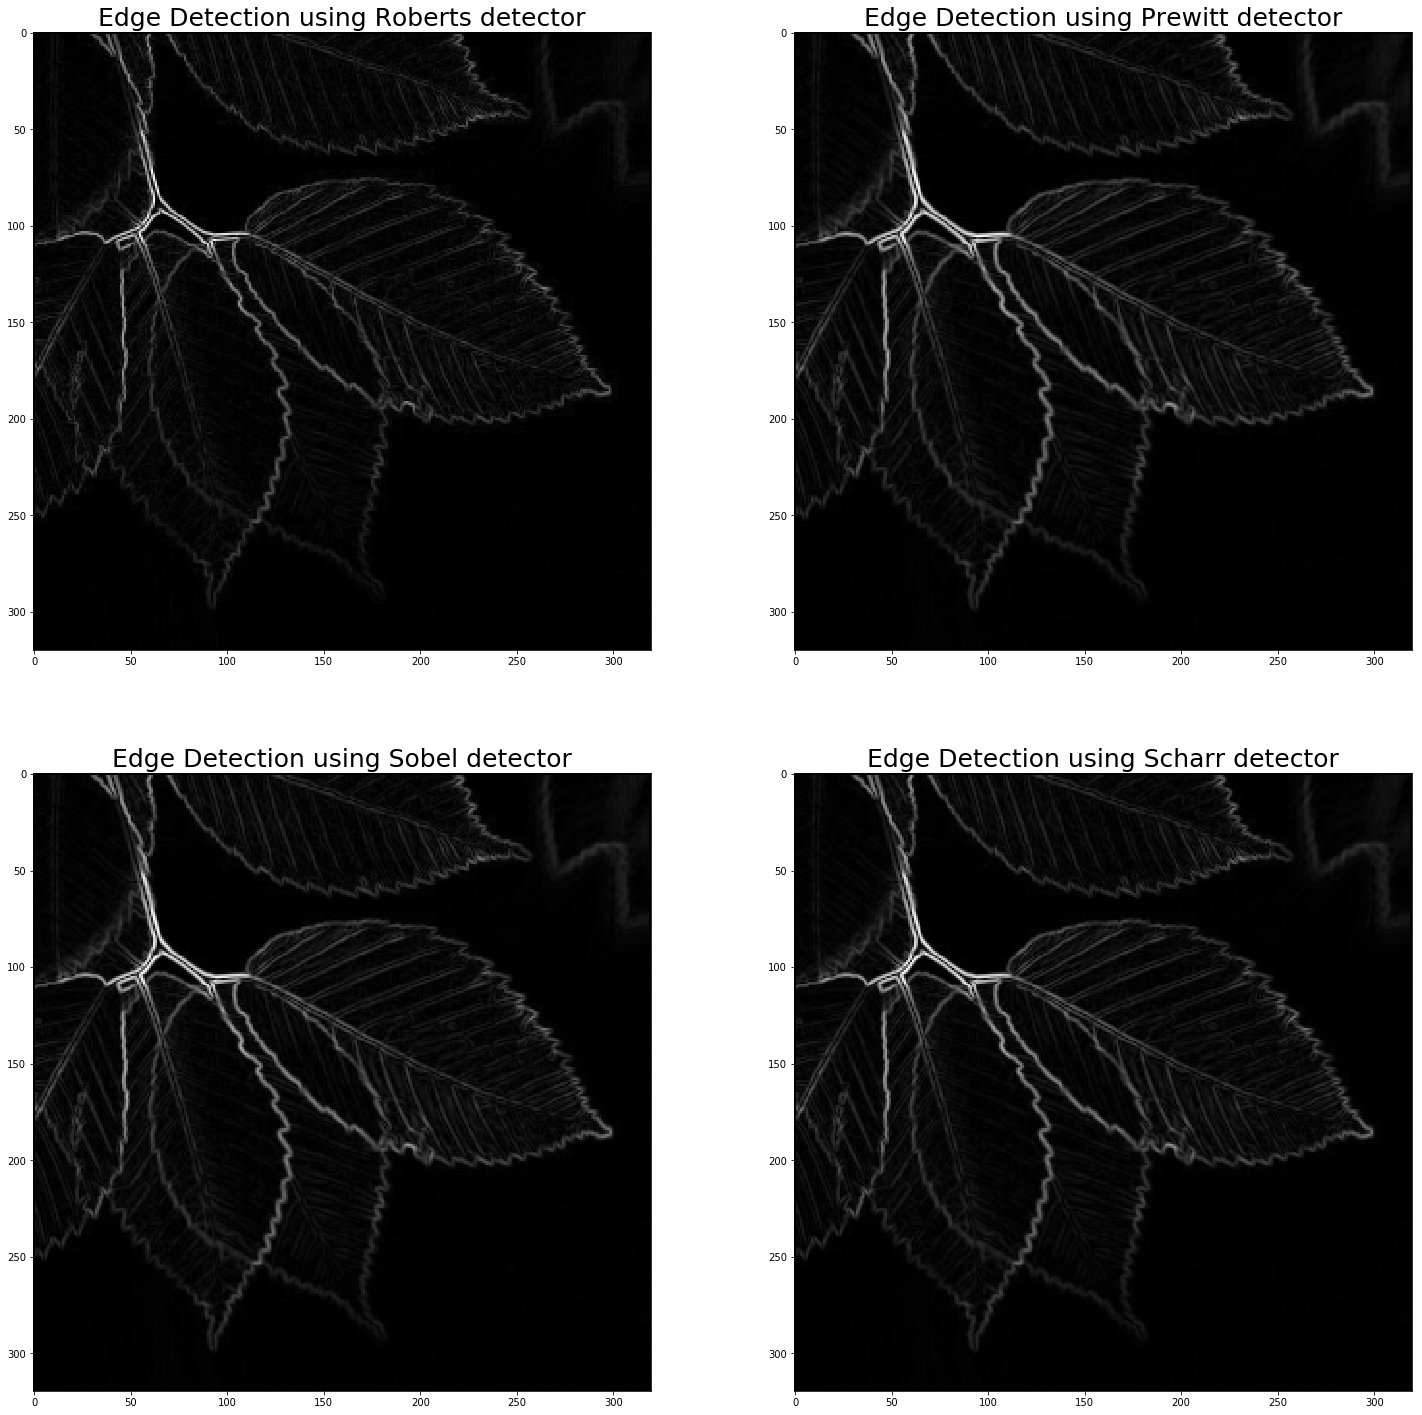

In [9]:
#import of the leaves's image from the devices
img_path = './images/'
img_name = 'leaves.jpg'
leaves_image_path = img_path.__add__(img_name)
leaves_image = io.imread(leaves_image_path,as_grey = True)
IsGrey(leaves_image)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
ax0, ax1, ax2, ax3 = axes.ravel()

edges_roberts = filters.roberts(leaves_image)
edges_prewitt = filters.prewitt(leaves_image)
edges_sobel = filters.sobel(leaves_image)
edges_scharr = filters.scharr(leaves_image)

ax0.imshow(edges_roberts,cmap = cm.gray)
ax1.imshow(edges_prewitt,cmap = cm.gray)
ax2.imshow(edges_sobel,cmap = cm.gray)
ax3.imshow(edges_scharr,cmap = cm.gray)

ax0.set_title('Edge Detection using Roberts detector',fontsize=25)
ax1.set_title('Edge Detection using Prewitt detector',fontsize=25)
ax2.set_title('Edge Detection using Sobel detector',fontsize=25)
ax3.set_title('Edge Detection using Scharr detector',fontsize=25)


**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

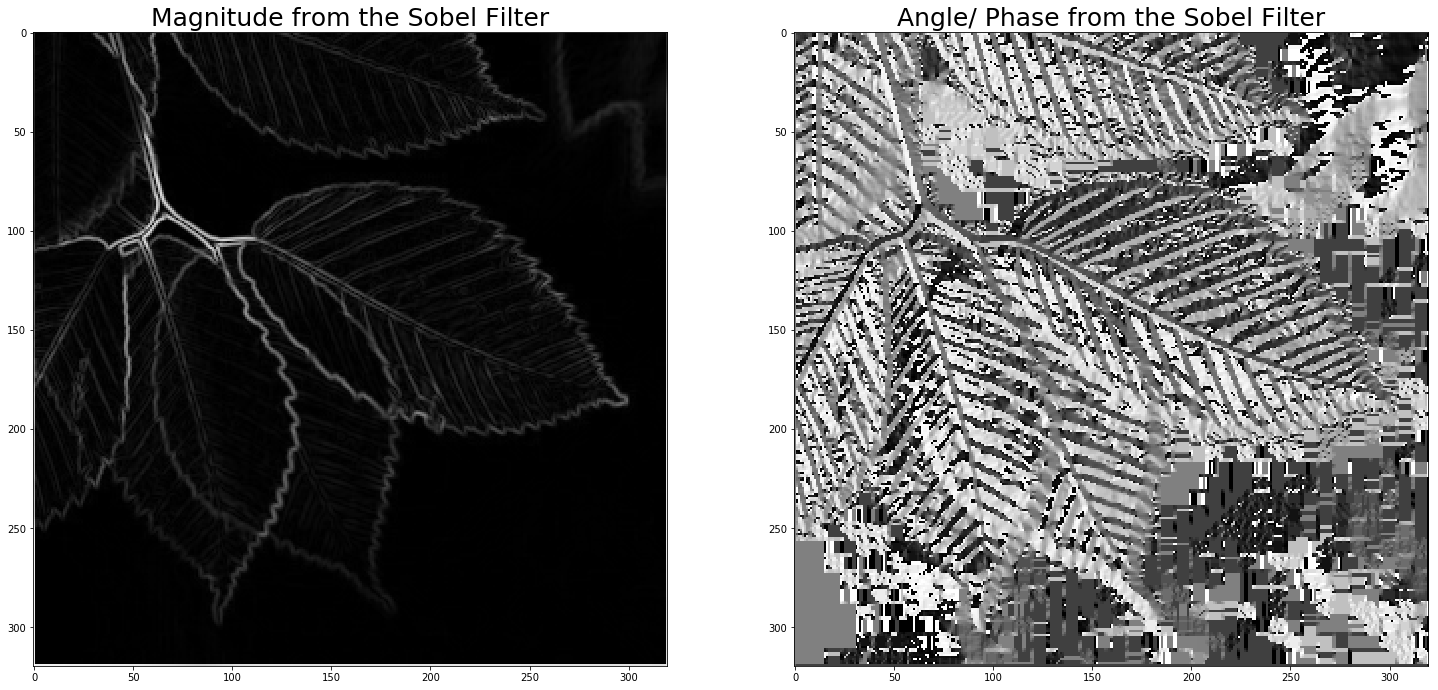

In [10]:
#define horixontal and vertical operator of SOBELs
S_horizontal=np.array(([1, 0, -1], [2, 0, -2], [1, 0, -1]),np.int)
S_vertical=np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]),np.int)

Filtered_leaves_image_horizontal=ndimage.convolve(leaves_image, S_horizontal, mode='constant', cval=0.0)
Filtered_leaves_image_Vertical=ndimage.convolve(leaves_image, S_vertical, mode='constant', cval=0.0)  

Magnitude_from_Filter = np.sqrt(Filtered_leaves_image_horizontal **2 + Filtered_leaves_image_Vertical**2)
Angle_from_Filter = np.arctan2(Filtered_leaves_image_Vertical, Filtered_leaves_image_horizontal)  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
ax0, ax1= axes.ravel()

ax0.imshow(Magnitude_from_Filter,cmap = cm.gray)
ax1.imshow(Angle_from_Filter,cmap = cm.gray)

ax0.set_title('Magnitude from the Sobel Filter',fontsize=25)
ax1.set_title('Angle/ Phase from the Sobel Filter',fontsize=25)


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

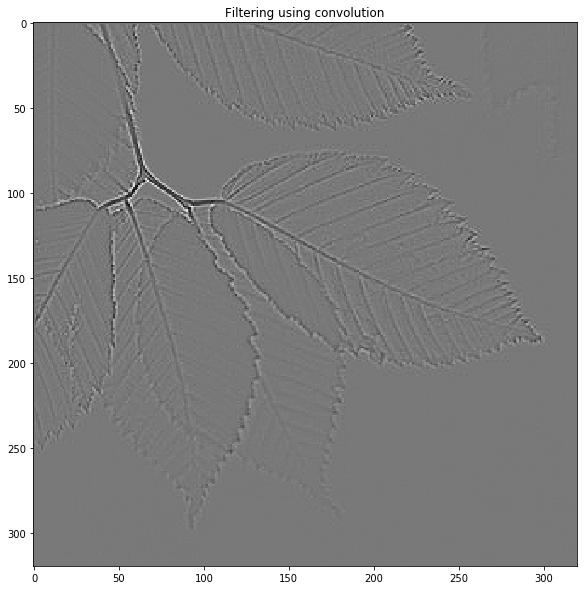

In [11]:
leaves_image_2nd_order_Lap_Filter = filters.laplace(leaves_image)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(leaves_image_2nd_order_Lap_Filter,cmap = cm.gray)
axes.set_title('Filtering using convolution')

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

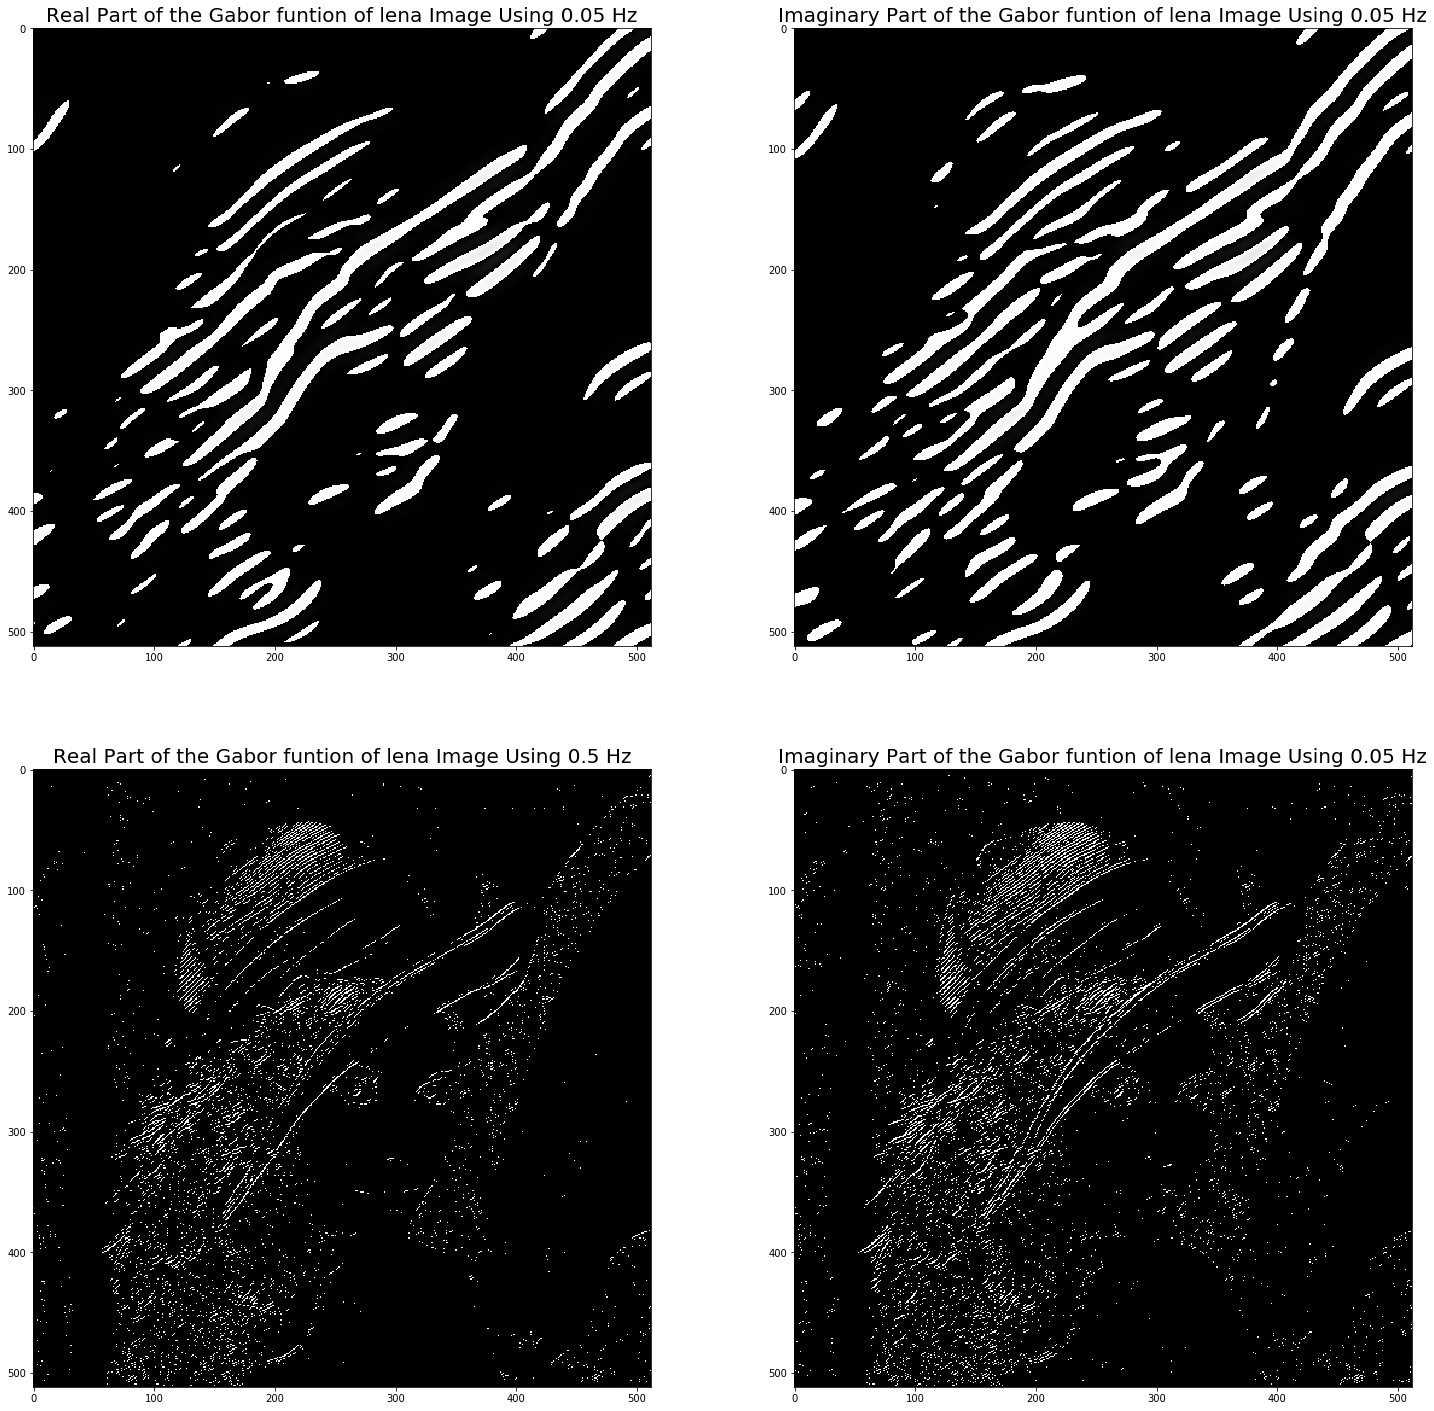

In [12]:
Real_part_Gabor_frq0_05,Imag_part_Gabor_frq0_05 = filters.gabor(lena_grey, frequency=0.05, theta=(60/57.3))
Real_part_Gabor_frq0_5,Imag_part_Gabor_frq0_5 = filters.gabor(lena_grey, frequency=0.5, theta=(60/57.3))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Real_part_Gabor_frq0_05,cmap = cm.gray)
ax1.imshow(Imag_part_Gabor_frq0_05,cmap = cm.gray)
ax2.imshow(Real_part_Gabor_frq0_5,cmap = cm.gray)
ax3.imshow(Imag_part_Gabor_frq0_5,cmap = cm.gray)

ax0.set_title('Real Part of the Gabor funtion of lena Image Using 0.05 Hz',fontsize=20)
ax1.set_title('Imaginary Part of the Gabor funtion of lena Image Using 0.05 Hz',fontsize=20)
ax2.set_title('Real Part of the Gabor funtion of lena Image Using 0.5 Hz',fontsize=20)
ax3.set_title('Imaginary Part of the Gabor funtion of lena Image Using 0.05 Hz',fontsize=20)

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [13]:
from skimage import util

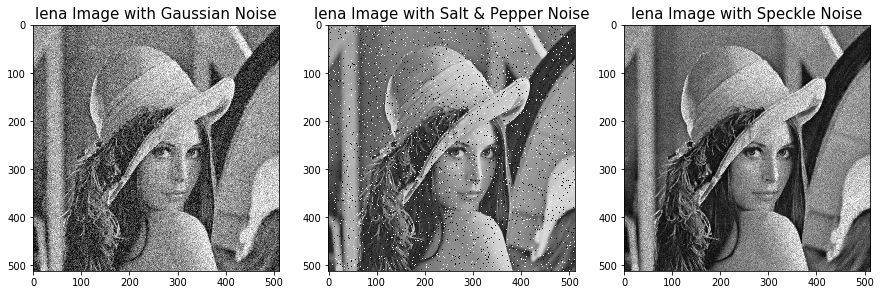

In [14]:
Gaussian_Noise_Lena= random_noise(lena_grey, mode='gaussian', seed=None, clip=True)
salt_pepper_lena= random_noise(lena_grey, mode='s&p', seed=None, clip=True)
Speckle_noise_lena= random_noise(lena_grey, mode='speckle', seed=None, clip=True)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(Gaussian_Noise_Lena,cmap = cm.gray)
ax1.imshow(salt_pepper_lena,cmap = cm.gray)
ax2.imshow(Speckle_noise_lena,cmap = cm.gray)

ax0.set_title('lena Image with Gaussian Noise',fontsize=15)
ax1.set_title('lena Image with Salt & Pepper Noise',fontsize=15)
ax2.set_title('lena Image with Speckle Noise',fontsize=15)

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


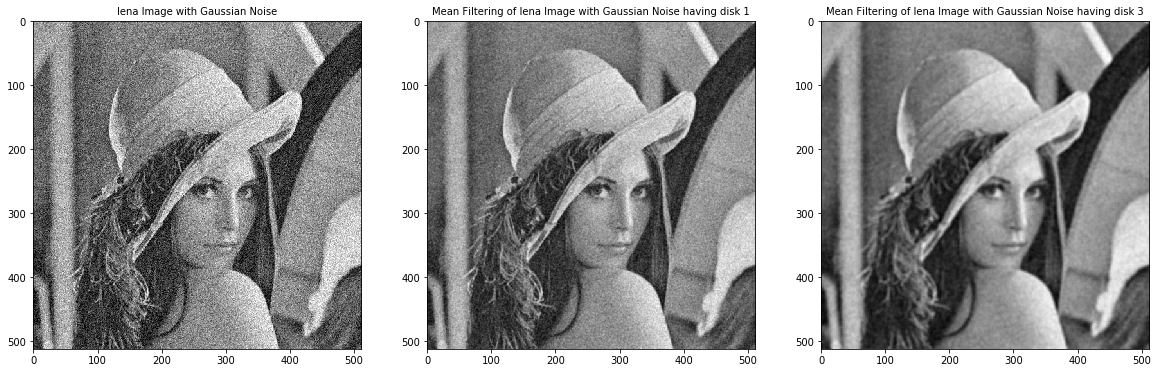

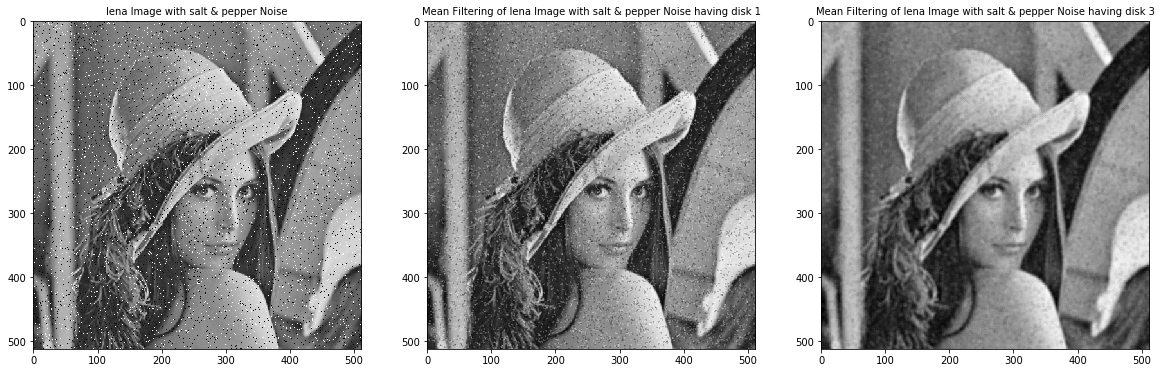

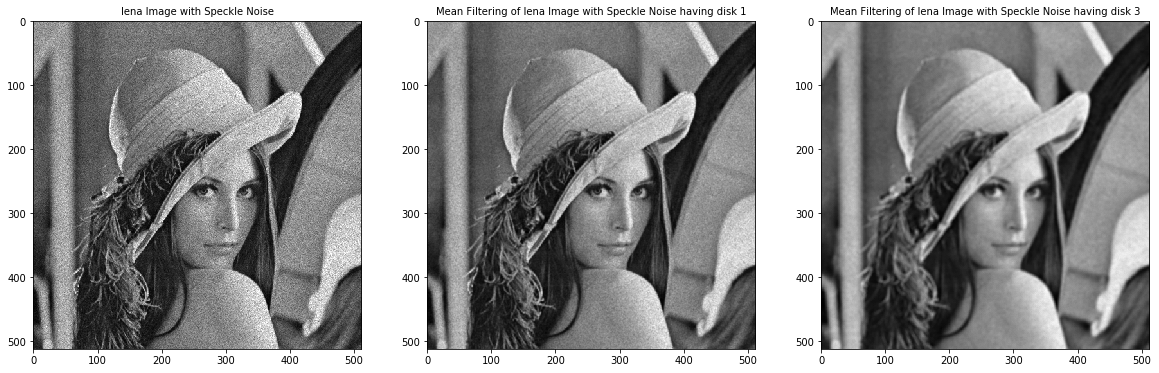

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
ax0, ax1, ax2= axes.ravel()
ax0.imshow(Gaussian_Noise_Lena,cmap = cm.gray)
k1=mean(Gaussian_Noise_Lena,disk(1))
ax1.imshow(k1,cmap = cm.gray)
k2=mean(Gaussian_Noise_Lena,disk(3))
ax2.imshow(k2,cmap = cm.gray)
ax0.set_title('lena Image with Gaussian Noise',fontsize=10)
ax1.set_title('Mean Filtering of lena Image with Gaussian Noise having disk 1',fontsize=10)
ax2.set_title('Mean Filtering of lena Image with Gaussian Noise having disk 3',fontsize=10)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
ax0, ax1, ax2= axes.ravel()
ax0.imshow(salt_pepper_lena,cmap = cm.gray)
k1=mean(salt_pepper_lena,disk(1))
ax1.imshow(k1,cmap = cm.gray)
k2=mean(salt_pepper_lena,disk(3))
ax2.imshow(k2,cmap = cm.gray)
ax0.set_title('lena Image with salt & pepper Noise',fontsize=10)
ax1.set_title('Mean Filtering of lena Image with salt & pepper Noise having disk 1',fontsize=10)
ax2.set_title('Mean Filtering of lena Image with salt & pepper Noise having disk 3',fontsize=10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
ax0, ax1, ax2= axes.ravel()
ax0.imshow(Speckle_noise_lena,cmap = cm.gray)
k1=mean(Speckle_noise_lena,disk(1))
ax1.imshow(k1,cmap = cm.gray)
k2=mean(Speckle_noise_lena,disk(3))
ax2.imshow(k2,cmap = cm.gray)
ax0.set_title('lena Image with Speckle Noise',fontsize=10)
ax1.set_title('Mean Filtering of lena Image with Speckle Noise having disk 1',fontsize=10)
ax2.set_title('Mean Filtering of lena Image with Speckle Noise having disk 3',fontsize=10)


** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


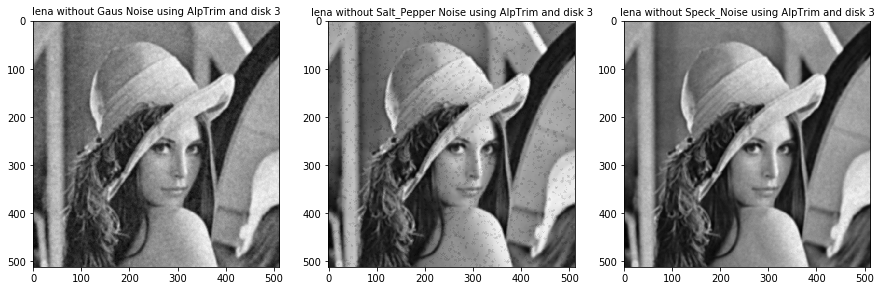

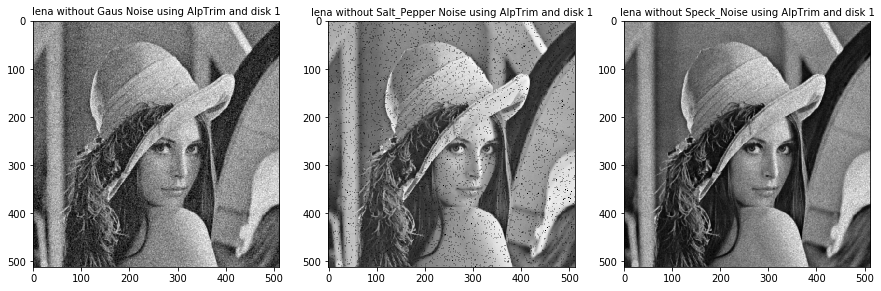

In [16]:
lena_Gaussian_alpha_trimmed = filters.rank.mean_percentile(Gaussian_Noise_Lena, disk(3), p0=0.05, p1=0.95)
lena_salt_pipper_alpha_trimmed = filters.rank.mean_percentile(salt_pepper_lena, disk(3), p0=0.05, p1=0.95)
lena_Speckle_Noise_alpha_trimmed= filters.rank.mean_percentile(Speckle_noise_lena, disk(3), p0=0.05, p1=0.95)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(lena_Gaussian_alpha_trimmed,cmap = cm.gray)
ax1.imshow(lena_salt_pipper_alpha_trimmed,cmap = cm.gray)
ax2.imshow(lena_Speckle_Noise_alpha_trimmed,cmap = cm.gray)

ax0.set_title('lena without Gaus Noise using AlpTrim and disk 3',fontsize=10)
ax1.set_title('lena without Salt_Pepper Noise using AlpTrim and disk 3',fontsize=10)
ax2.set_title('lena without Speck_Noise using AlpTrim and disk 3',fontsize=10)

lena_Gaussian_alpha_trimmed = filters.rank.mean_percentile(Gaussian_Noise_Lena, disk(1), p0=0.05, p1=0.95)
lena_salt_pipper_alpha_trimmed = filters.rank.mean_percentile(salt_pepper_lena, disk(1), p0=0.05, p1=0.95)
lena_Speckle_Noise_alpha_trimmed= filters.rank.mean_percentile(Speckle_noise_lena, disk(1), p0=0.05, p1=0.95)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(lena_Gaussian_alpha_trimmed,cmap = cm.gray)
ax1.imshow(lena_salt_pipper_alpha_trimmed,cmap = cm.gray)
ax2.imshow(lena_Speckle_Noise_alpha_trimmed,cmap = cm.gray)

ax0.set_title('lena without Gaus Noise using AlpTrim and disk 1',fontsize=10)
ax1.set_title('lena without Salt_Pepper Noise using AlpTrim and disk 1',fontsize=10)
ax2.set_title('lena without Speck_Noise using AlpTrim and disk 1',fontsize=10)

** Q.7.3 median filter: **

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


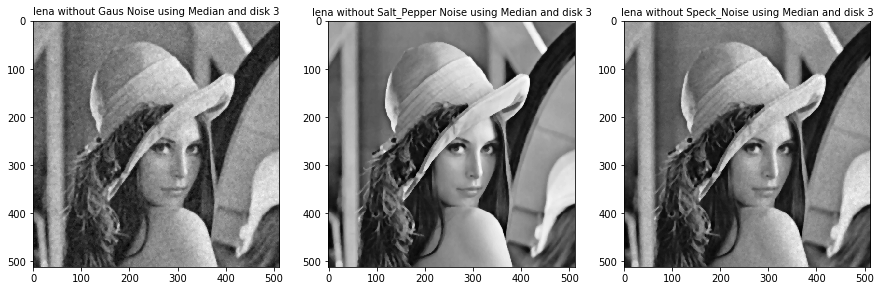

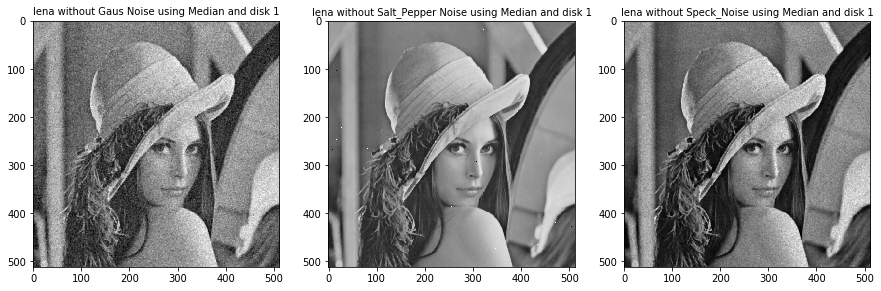

In [17]:
lena_Gaussian_Median= filters.rank.median(Gaussian_Noise_Lena, disk(3))
lena_salt_pipper_Median = filters.rank.median(salt_pepper_lena, disk(3))
lena_Speckle_Noise_Median= filters.rank.median(Speckle_noise_lena, disk(3))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(lena_Gaussian_Median,cmap = cm.gray)
ax1.imshow(lena_salt_pipper_Median,cmap = cm.gray)
ax2.imshow(lena_Speckle_Noise_Median,cmap = cm.gray)

ax0.set_title('lena without Gaus Noise using Median and disk 3',fontsize=10)
ax1.set_title('lena without Salt_Pepper Noise using Median and disk 3',fontsize=10)
ax2.set_title('lena without Speck_Noise using Median and disk 3',fontsize=10)

lena_Gaussian_Median= filters.rank.median(Gaussian_Noise_Lena, disk(1))
lena_salt_pipper_Median = filters.rank.median(salt_pepper_lena, disk(1))
lena_Speckle_Noise_Median= filters.rank.median(Speckle_noise_lena, disk(1))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(lena_Gaussian_Median,cmap = cm.gray)
ax1.imshow(lena_salt_pipper_Median,cmap = cm.gray)
ax2.imshow(lena_Speckle_Noise_Median,cmap = cm.gray)

ax0.set_title('lena without Gaus Noise using Median and disk 1',fontsize=10)
ax1.set_title('lena without Salt_Pepper Noise using Median and disk 1',fontsize=10)
ax2.set_title('lena without Speck_Noise using Median and disk 1',fontsize=10)

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

Image is in grey and You put correct image for this code!!


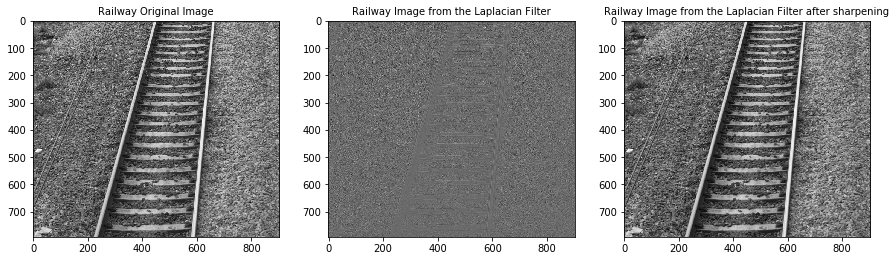

In [18]:
#import of the Railway's image from the devices
img_path = './images/'
img_name = 'railway.jpg'
Railway_image_path = img_path.__add__(img_name)
Railway_image = io.imread(Railway_image_path,as_grey = True)
IsGrey(Railway_image)
Railway_iamge_laplacian_Filter = filters.laplace(Railway_image)
k=10 #percentages of filtered image use for subtraction from the orginal railway Image
Railway_iamge_laplacian_Filter_Sharpening = Railway_image - (k/100)*Railway_iamge_laplacian_Filter

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(Railway_image,cmap = cm.gray)
ax1.imshow(Railway_iamge_laplacian_Filter,cmap = cm.gray)
ax2.imshow(Railway_iamge_laplacian_Filter_Sharpening,cmap = cm.gray)

ax0.set_title('Railway Original Image',fontsize=10)
ax1.set_title('Railway Image from the Laplacian Filter',fontsize=10)
ax2.set_title('Railway Image from the Laplacian Filter after sharpening',fontsize=10)

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**

In [24]:
#Define the Huge Functions
def Hough_transform_Function(Input_Image_Edge,Threshold,Line_gap):
    Lines_Huge = transform.probabilistic_hough_line(Input_Image_Edge,threshold=Threshold, line_length=10, line_gap=Line_gap, theta=None)
    Output_image_from_Huge = np.zeros_like(Input_Image_Edge,dtype=None, order='K', subok=True)
    for l in Lines_Huge:
        rr, cc = draw.line(l[0][1],l[0][0],l[1][1],l[1][0])
        Output_image_from_Huge[rr,cc] = 1
    return Output_image_from_Huge

Image is in grey and You put correct image for this code!!


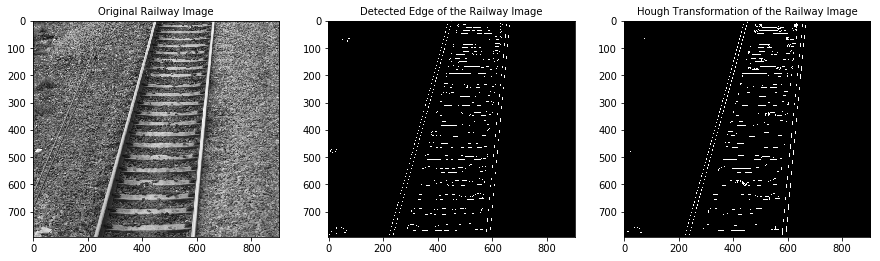

In [29]:
#import of the Railway's image from the devices
img_path = './images/'
img_name = 'railway.jpg'
Railway_image_path = img_path.__add__(img_name)
Railway_image = io.imread(Railway_image_path,as_grey = True)
IsGrey(Railway_image)

Railway_iamge_edge = feature.canny(Railway_image, sigma=5.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
Railway_image_Hough = Hough_transform_Function(Railway_iamge_edge, 10, 10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(Railway_image,cmap = cm.gray)
ax1.imshow(Railway_iamge_edge,cmap = cm.gray)
ax2.imshow(Railway_image_Hough,cmap = cm.gray)

ax0.set_title('Original Railway Image',fontsize=10)
ax1.set_title('Detected Edge of the Railway Image',fontsize=10)
ax2.set_title('Hough Transformation of the Railway Image',fontsize=10)

Image is in grey and You put correct image for this code!!


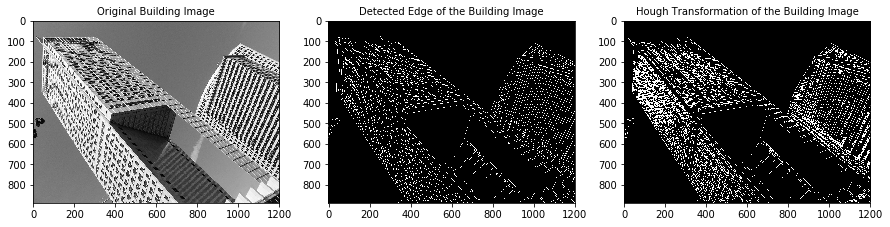

In [32]:
#import of the Building's image from the devices
img_path = './images/'
img_name = 'building.jpg'
Building_image_path = img_path.__add__(img_name)
Building_image = io.imread(Building_image_path,as_grey = True)
IsGrey(Building_image)

Building_iamge_edge = feature.canny(Building_image, sigma=3.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
Building_image_Hough = Hough_transform_Function(Building_iamge_edge, 10, 10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0, ax1, ax2= axes.ravel()

ax0.imshow(Building_image,cmap = cm.gray)
ax1.imshow(Building_iamge_edge,cmap = cm.gray)
ax2.imshow(Building_image_Hough,cmap = cm.gray)

ax0.set_title('Original Building Image',fontsize=10)
ax1.set_title('Detected Edge of the Building Image',fontsize=10)
ax2.set_title('Hough Transformation of the Building Image',fontsize=10)